# WeatherPy_Walsh_Gold
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install gmaps
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension
#!pip install citipy
#!pip install openweathermapy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
import json
import csv
import datetime

import openweathermapy.core as owm
import os  # For getting API key from computer

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## tried to get key from os
api_key = os.environ.get('weather_api_key')

# Output File (CSV)
output_data_file = "output_data/cities.csv"

## Generate Cities List

In [4]:
## Generate random latitude and longitudes
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs tuples
lat_lng_rand = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lng_rand = zip(lats, lngs)

## Generate cities list from random latitudes and longitudes using citipy.nearest_city
# List for holding cities
cities = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lng_rand:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Set api for openweathermap
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create settings dictionary for key parameters
settings = {"units": "imperial", "appid": api_key}

city_name_name = ['name','clouds.all','sys.country','dt',
                  'main.humidity','coord.lat','coord.lon','main.temp_max','wind.speed']

all_in_one = []
count = 0
rec = 0
set = 1

for city in cities:

    if count == 50:
        time.sleep(1.1)
        count = 0
        rec = 0
        set+=1
    try:
        # Openweathermap API call to get current weather for a city
        current_weather_city = owm.get_current(city, **settings)
        awesome_city = current_weather_city(*city_name_name)
        count += 1
        rec += 1

        print(f"Processing Record {rec} of Set {set} | {current_weather_city['name']}.")
        all_in_one.append(awesome_city)

    except:
        print("City not found. Skipping...")
         


Processing Record 1 of Set 1 | Plettenberg Bay.
Processing Record 2 of Set 1 | Waingapu.
Processing Record 3 of Set 1 | New Norfolk.
Processing Record 4 of Set 1 | Punta de Piedra.
City not found. Skipping...
Processing Record 5 of Set 1 | Rikitea.
Processing Record 6 of Set 1 | Gallup.
Processing Record 7 of Set 1 | Albany.
Processing Record 8 of Set 1 | Hervey Bay.
Processing Record 9 of Set 1 | Praia da Vitoria.
City not found. Skipping...
City not found. Skipping...
Processing Record 10 of Set 1 | Wamba.
Processing Record 11 of Set 1 | Castro.
Processing Record 12 of Set 1 | Hobart.
Processing Record 13 of Set 1 | Hermanus.
City not found. Skipping...
Processing Record 14 of Set 1 | Kupang.
Processing Record 15 of Set 1 | Ushuaia.
Processing Record 16 of Set 1 | Barrow.
Processing Record 17 of Set 1 | Guerrero Negro.
City not found. Skipping...
Processing Record 18 of Set 1 | Marsa Matruh.
Processing Record 19 of Set 1 | Hasaki.
Processing Record 20 of Set 1 | Ambilobe.
Processing 

Processing Record 31 of Set 4 | Chapais.
Processing Record 32 of Set 4 | Kaitangata.
Processing Record 33 of Set 4 | Selenduma.
Processing Record 34 of Set 4 | Pinsk.
City not found. Skipping...
Processing Record 35 of Set 4 | Maceio.
Processing Record 36 of Set 4 | Aykhal.
Processing Record 37 of Set 4 | Ancud.
Processing Record 38 of Set 4 | Kirakira.
Processing Record 39 of Set 4 | Vila Franca do Campo.
Processing Record 40 of Set 4 | Shimoda.
City not found. Skipping...
Processing Record 41 of Set 4 | Pacific Grove.
Processing Record 42 of Set 4 | Paso de Carrasco.
Processing Record 43 of Set 4 | Uthal.
Processing Record 44 of Set 4 | Namatanai.
Processing Record 45 of Set 4 | Bubaque.
Processing Record 46 of Set 4 | West Plains.
City not found. Skipping...
Processing Record 47 of Set 4 | Brumunddal.
City not found. Skipping...
Processing Record 48 of Set 4 | Tabas.
Processing Record 49 of Set 4 | Lasa.
Processing Record 50 of Set 4 | Yellowknife.
Processing Record 1 of Set 5 | Ban

Processing Record 10 of Set 8 | Lindi.
Processing Record 11 of Set 8 | Roebourne.
Processing Record 12 of Set 8 | Jinchang.
Processing Record 13 of Set 8 | Bonavista.
Processing Record 14 of Set 8 | Guayaramerin.
Processing Record 15 of Set 8 | Vestmannaeyjar.
Processing Record 16 of Set 8 | Deputatskiy.
Processing Record 17 of Set 8 | San Quintin.
City not found. Skipping...
Processing Record 18 of Set 8 | Chake Chake.
Processing Record 19 of Set 8 | Khandyga.
Processing Record 20 of Set 8 | Nazareno.
Processing Record 21 of Set 8 | Brejo Santo.
Processing Record 22 of Set 8 | Cap Malheureux.
Processing Record 23 of Set 8 | Nizhniy Bestyakh.
Processing Record 24 of Set 8 | Sena Madureira.
Processing Record 25 of Set 8 | North Bend.
Processing Record 26 of Set 8 | Amapa.
Processing Record 27 of Set 8 | Jos.
Processing Record 28 of Set 8 | Saint-Ambroise.
Processing Record 29 of Set 8 | Lososina.
City not found. Skipping...
Processing Record 30 of Set 8 | Carutapera.
City not found. Ski

Processing Record 43 of Set 11 | Oktyabrskiy.
Processing Record 44 of Set 11 | Njombe.
Processing Record 45 of Set 11 | Paramonga.
Processing Record 46 of Set 11 | Iwanai.
Processing Record 47 of Set 11 | Buala.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Converting Raw Data to DataFrame
weather_data = pd.DataFrame(all_in_one,
                            columns=['City', 'Cloudiness', 'Country','Date',
                                     'Humidity','Lat','lng','Max Temp','Wind Speed'])

# Writing data to csv file
weather_data.to_csv(output_data_file, header=True, index=True, index_label= 'Index')

In [7]:
weather_data.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [8]:
weather_data.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,lng,Max Temp,Wind Speed
0,Plettenberg Bay,71,ZA,1563631483,71,-34.05,23.37,48.64,3.04
1,Waingapu,93,ID,1563631483,92,-9.65,120.26,67.00,8.43
2,New Norfolk,0,AU,1563631483,71,-42.78,147.06,54.00,9.17
3,Punta de Piedra,87,VE,1563631483,86,7.62,-71.49,76.90,2.06
4,Rikitea,100,PF,1563631483,58,-23.12,-134.97,66.28,8.95


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

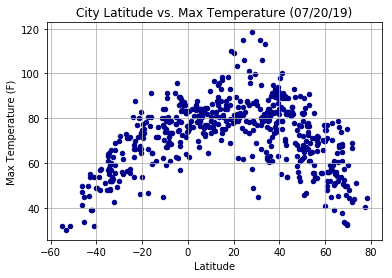

In [9]:
ax1 = weather_data.plot.scatter(x='Lat', y='Max Temp', c='DarkBlue')

# Adding grid, title, and labels
plt.grid(True)
plt.title('City Latitude vs. Max Temperature (' + time.strftime("%m/%d/%y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('output_data/Lat_vs_Temp.png', bbox_inches="tight")

#### Latitude vs. Humidity Plot

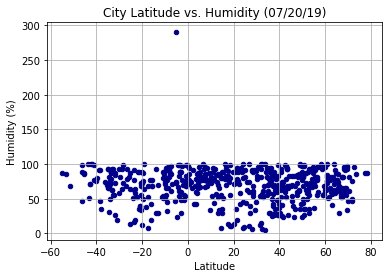

In [10]:
ax1 = weather_data.plot.scatter(x='Lat', y='Humidity', c='DarkBlue')

# Adding grid, title, and labels
plt.grid(True)
plt.title('City Latitude vs. Humidity (' + time.strftime("%m/%d/%y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/Lat_vs_Humidity.png', bbox_inches="tight")

#### Latitude vs. Cloudiness Plot

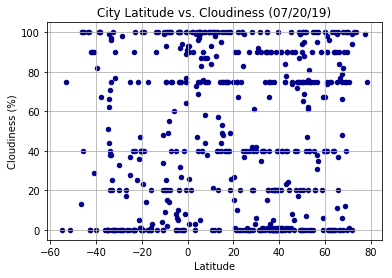

In [11]:
ax1 = weather_data.plot.scatter(x='Lat', y='Cloudiness', c='DarkBlue')

# Adding grid, title, and labels
plt.grid(True)
plt.title('City Latitude vs. Cloudiness (' + time.strftime("%m/%d/%y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('output_data/Lat_vs_Cloudiness.png', bbox_inches="tight")

#### Latitude vs. Wind Speed Plot

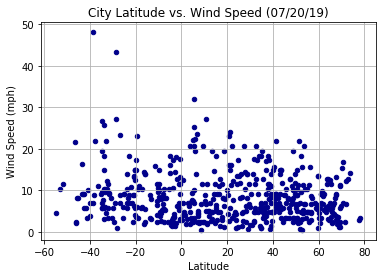

In [12]:
ax1 = weather_data.plot.scatter(x='Lat', y='Wind Speed', c='DarkBlue')

# Adding grid, title, and labels
plt.grid(True)
plt.title('City Latitude vs. Wind Speed (' + time.strftime("%m/%d/%y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('output_data/Lat_vs_WindSpeed.png', bbox_inches="tight")

### Observable trends
* 1. The temperature is highest 20 to 40 degrees north of the equator, which is consistent with the seasonal expectation.
* 2. Cloud coverage is consistent world-wide and across the range of latitude.
* 3. Wind speeds show a slight peak around the equator.
